In [26]:
import cv2
from matplotlib import pyplot as plt 
image_file = 'C:/Users/Seif2/Pictures/Screenshots/Screenshot 2025-11-16 165312.png'
img= cv2.imread(image_file)


In [ ]:
cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [27]:
#https://stackoverflow.com/questions/28816046/
#displaying-different-images-with-actual-size-in-matplotlib-subplot
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

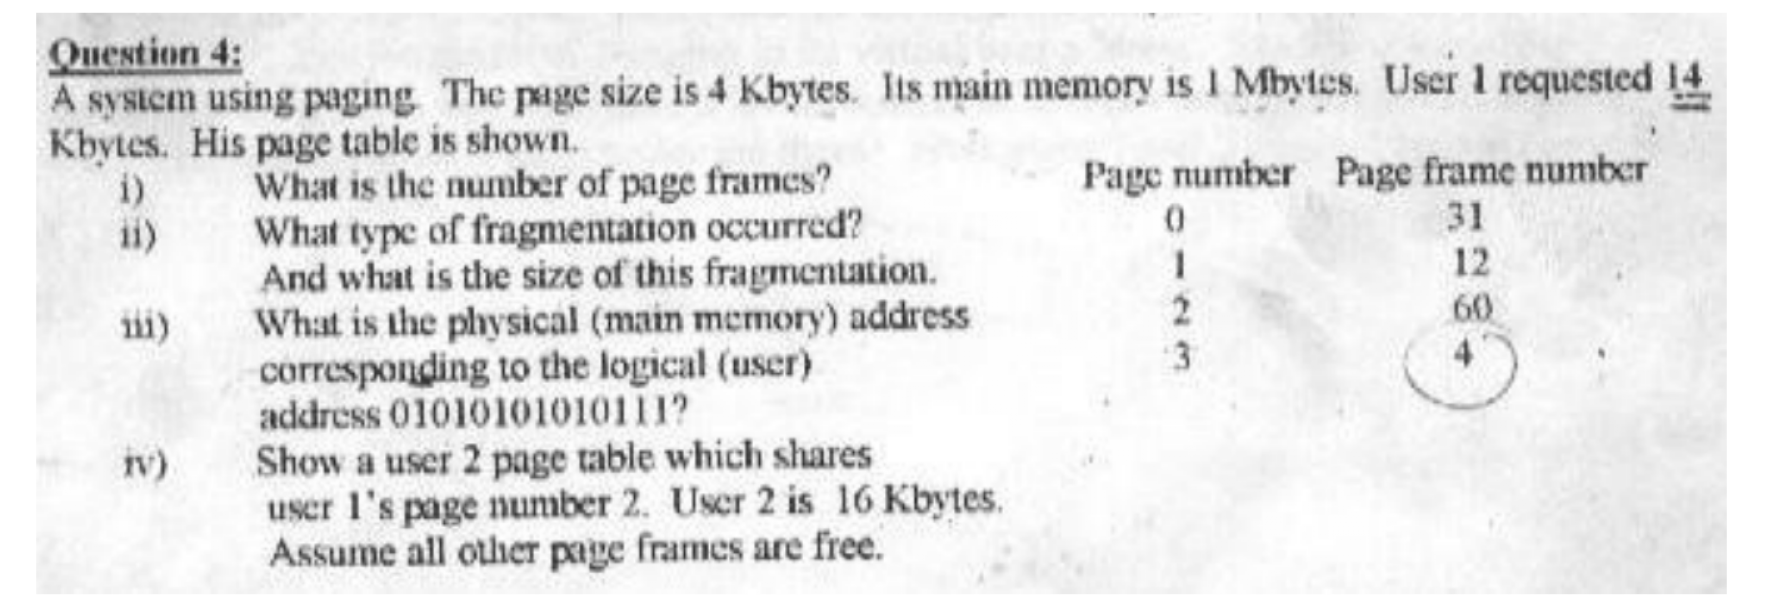

In [28]:
display(image_file)

inverted Images


In [29]:
inverted_image = cv2.bitwise_not(img)
#cv2.imshow("Inverted Image", inverted_image)
#cv2.waitKey(0)
cv2.imwrite("E:/CV EPSLON/IntelligentDocSys/backend/datasets/inverted_img.jpg", inverted_image)
#cv2.destroyAllWindows()

True

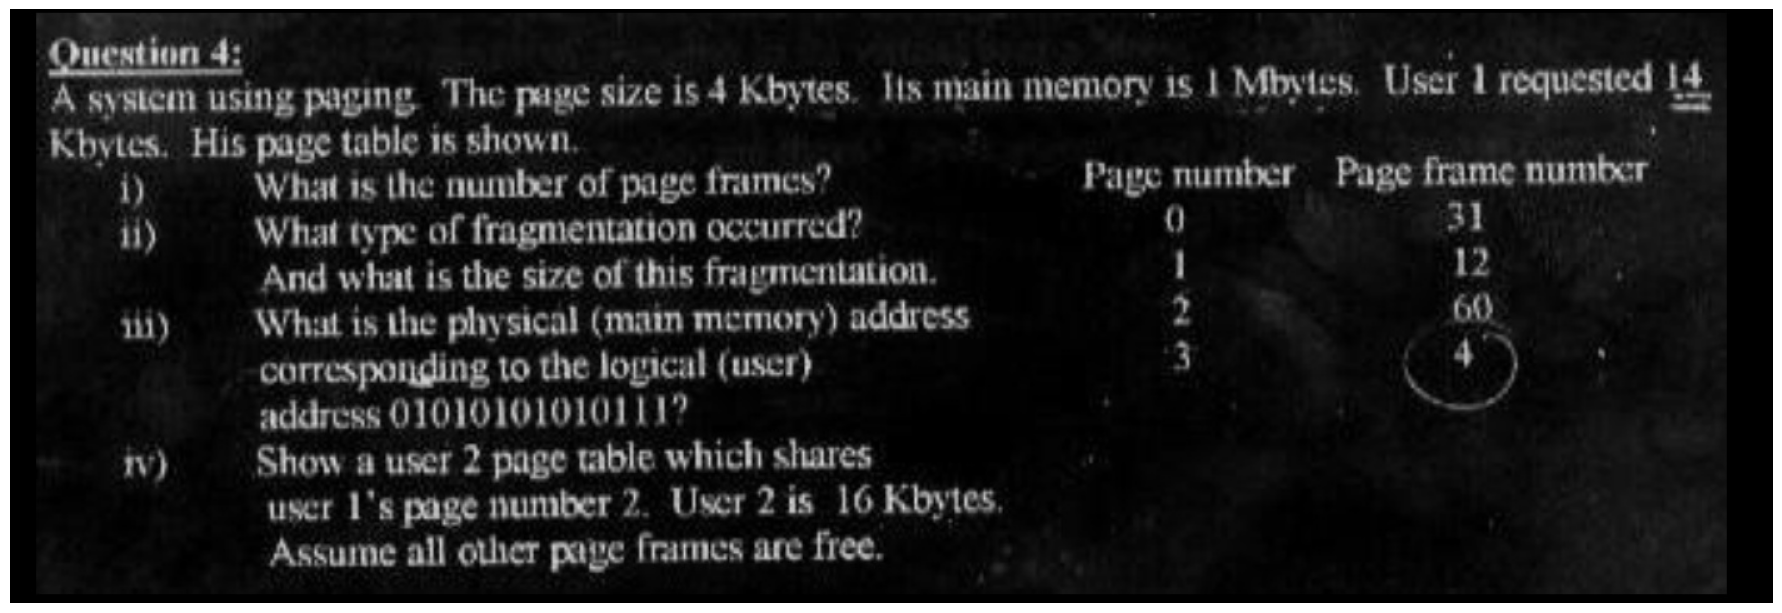

In [30]:
display("E:/CV EPSLON/IntelligentDocSys/backend/datasets/inverted_img.jpg")

Rescaling

Binarization

In [31]:
def grayscale(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [32]:
gray_img = grayscale(img)
cv2.imwrite("E:/CV EPSLON/IntelligentDocSys/backend/datasets/grey_img.jpg",gray_img)

True

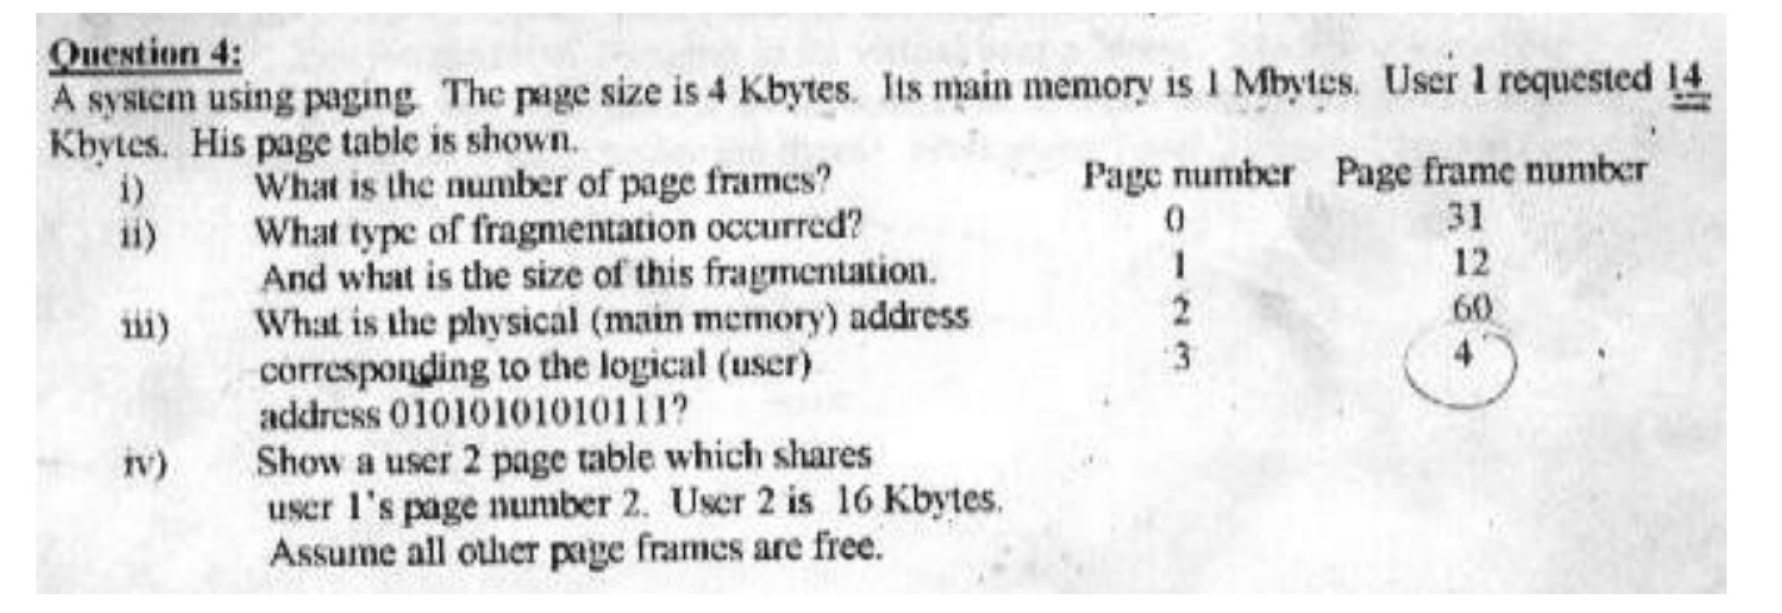

In [33]:
display("E:/CV EPSLON/IntelligentDocSys/backend/datasets/grey_img.jpg")

In [69]:
thresh, im_bw = cv2.threshold(gray_img, 180,120, cv2.THRESH_BINARY)
cv2.imwrite("E:/CV EPSLON/IntelligentDocSys/backend/datasets/im_bw_img.jpg",im_bw)

True

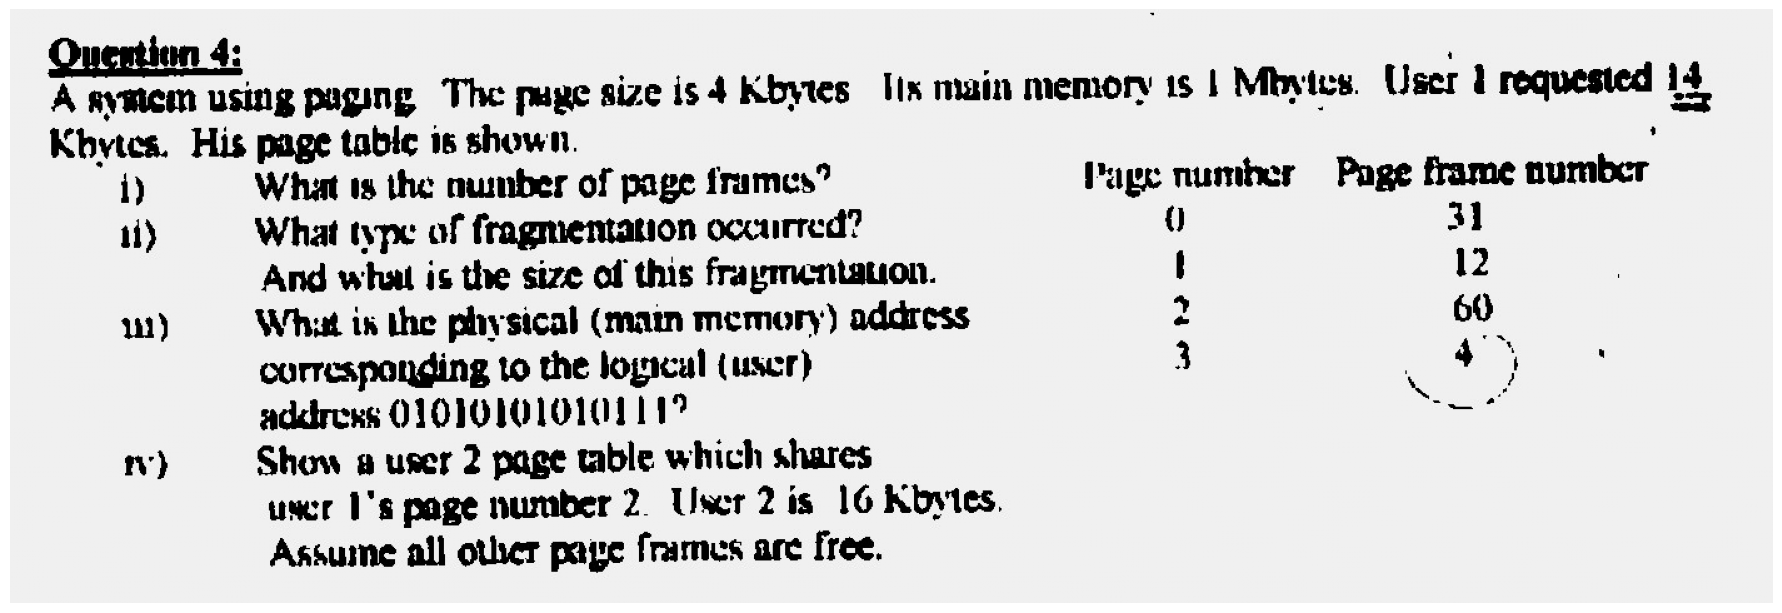

In [70]:
display("IntelligentDocSys/backend/datasets/im_bw_img.jpg")

Noise removal

In [71]:
def noise_removal (image):
    import numpy as np
    kernel = np.ones((1,1),np.uint8)
    image = cv2.dilate(image,kernel,iterations=1)
    kernel = np.ones((1,1),np.uint8)
    image = cv2.erode(image,kernel,iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image,3)
    return (image)

In [72]:
no_noise_img = noise_removal(im_bw)
cv2.imwrite("E:/CV EPSLON/IntelligentDocSys/backend/datasets/no_noise_img.jpg",no_noise_img)

True

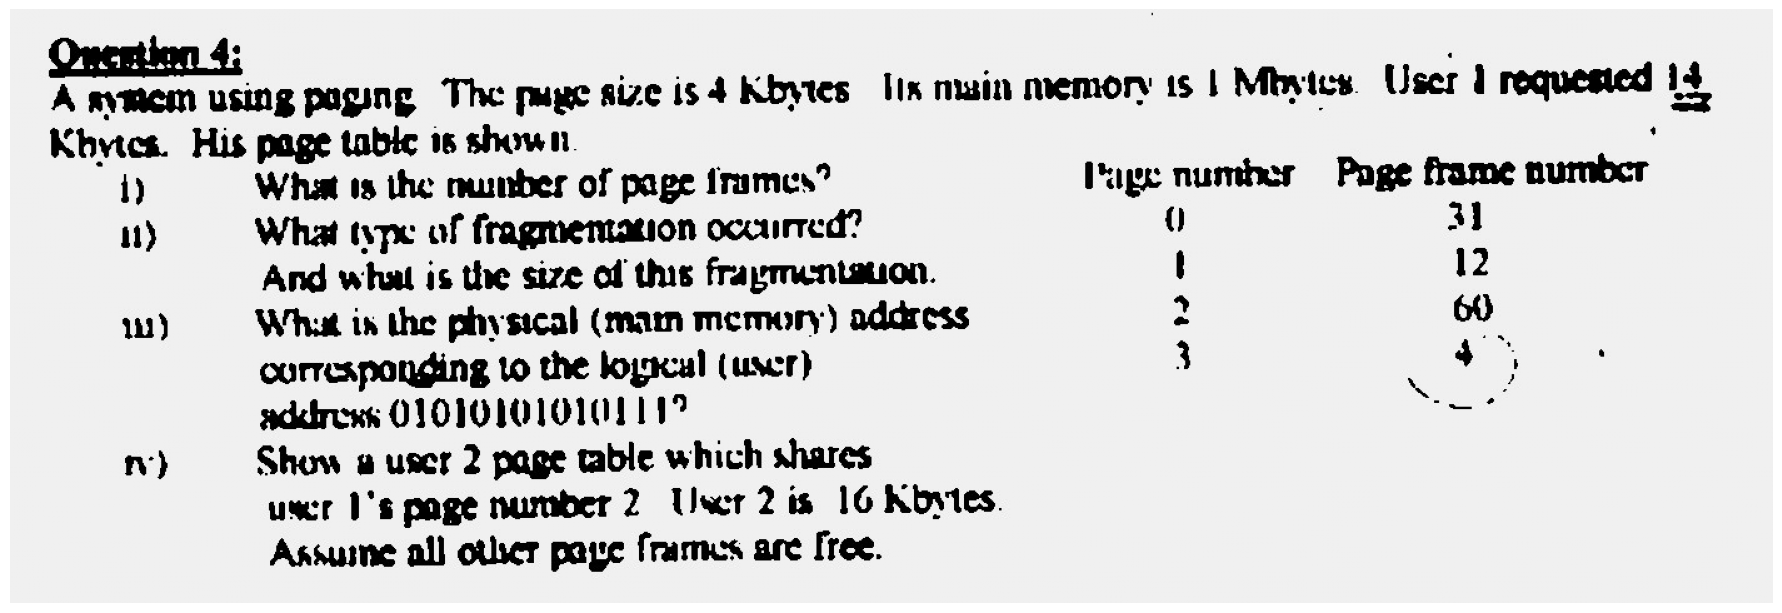

In [73]:
display("E:/CV EPSLON/IntelligentDocSys/backend/datasets/no_noise_img.jpg")

Dilation and Erosion

In [99]:
def thin_font(image):
    import numpy as np 
    image = cv2.bitwise_not(image)
    kernel = np.ones((1 ,1),np.uint8)
    image = cv2.erode(image,kernel,iterations = 4)
    image = cv2.bitwise_not(image)
    return image

In [100]:
eroded_img = thin_font(no_noise_img)
cv2.imwrite("E:/CV EPSLON/IntelligentDocSys/backend/datasets/eroded_img.jpg", eroded_img)

True

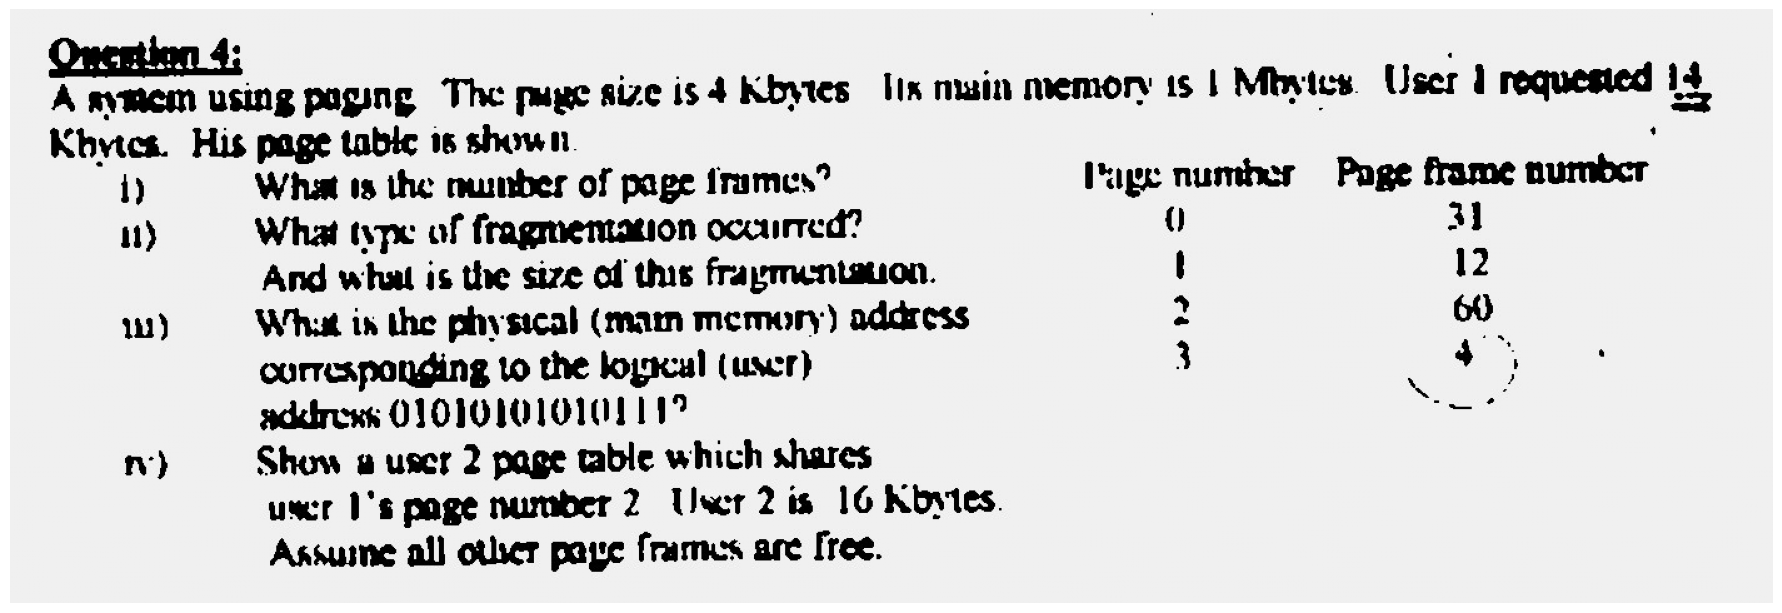

In [101]:
display("E:/CV EPSLON/IntelligentDocSys/backend/datasets/eroded_img.jpg")

In [102]:
def thick_font(image):
    import numpy as np 
    image = cv2.bitwise_not(image)
    kernel = np.ones((1 ,1),np.uint8)
    image = cv2.dilate(image,kernel,iterations = 4)
    image = cv2.bitwise_not(image)
    return image

In [103]:
dilated_image = thick_font(no_noise_img)
cv2.imwrite("E:/CV EPSLON/IntelligentDocSys/backend/datasets/dilated_image.jpg", dilated_image)

True

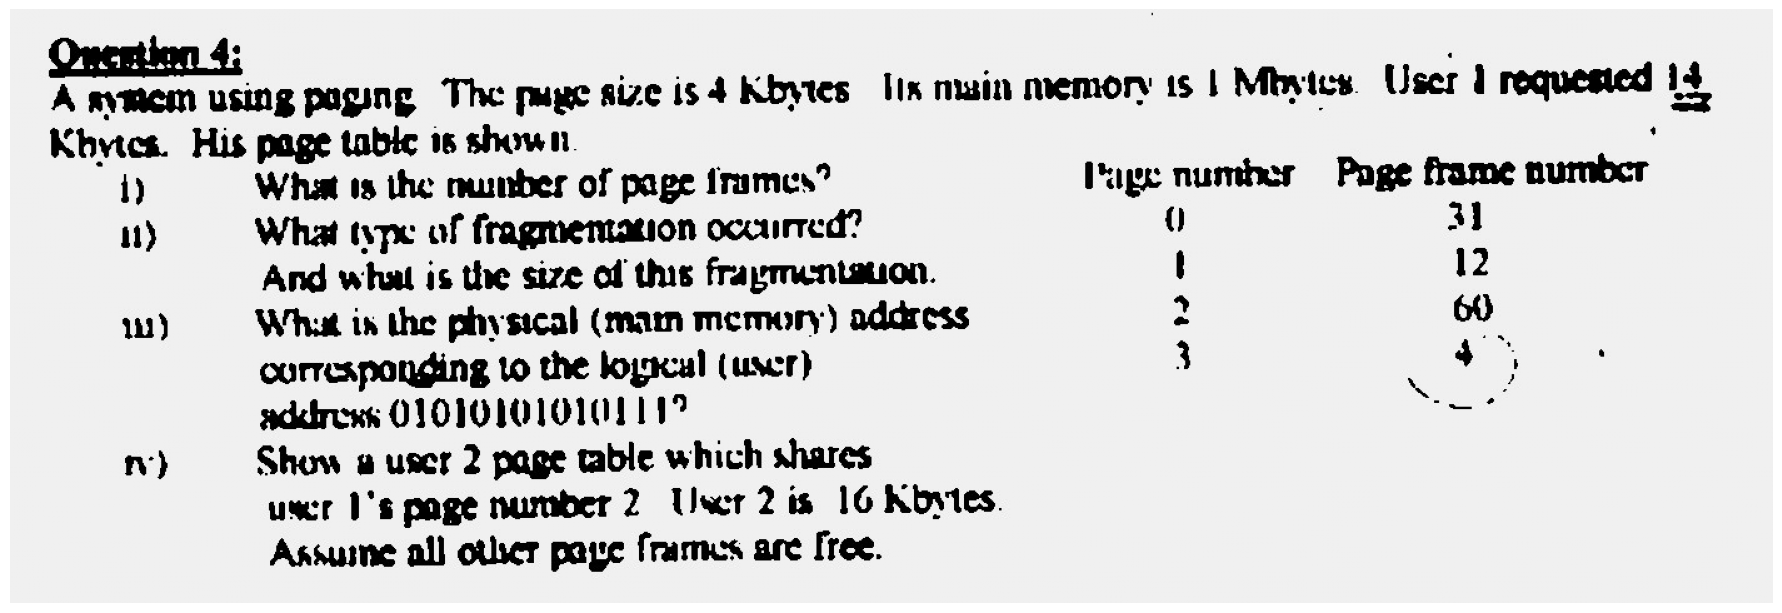

In [104]:
display("E:/CV EPSLON/IntelligentDocSys/backend/datasets/dilated_image.jpg")

Rotation and Deskewing

In [122]:
#https://becominghuman.ai/how-to-automatically-deskew-straighten-a-text-image-using-opencv-a0c30aed83df
import numpy as np

def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cvImage.copy()
    #gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(newImage, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=2)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    for c in contours:
        rect = cv2.boundingRect(c)
        x,y,w,h = rect
        cv2.rectangle(newImage,(x,y),(x+w,y+h),(0,255,0),2)

    # Find largest contour and surround in min area box
    largestContour = contours[0]
    print (len(contours))
    minAreaRect = cv2.minAreaRect(largestContour)
    cv2.imwrite("temp/boxes.jpg", newImage)
    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle
# Rotate the image around its center
def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage

In [108]:
def deskew_image(image):
    angle = getSkewAngle(image)
    return rotateImage(image,-1.0*angle)

In [111]:
fixed = deskew_image(img)
cv2.imwrite("E:/CV EPSLON/IntelligentDocSys/backend/datasets/fixed_img.jpg",fixed)

25


True

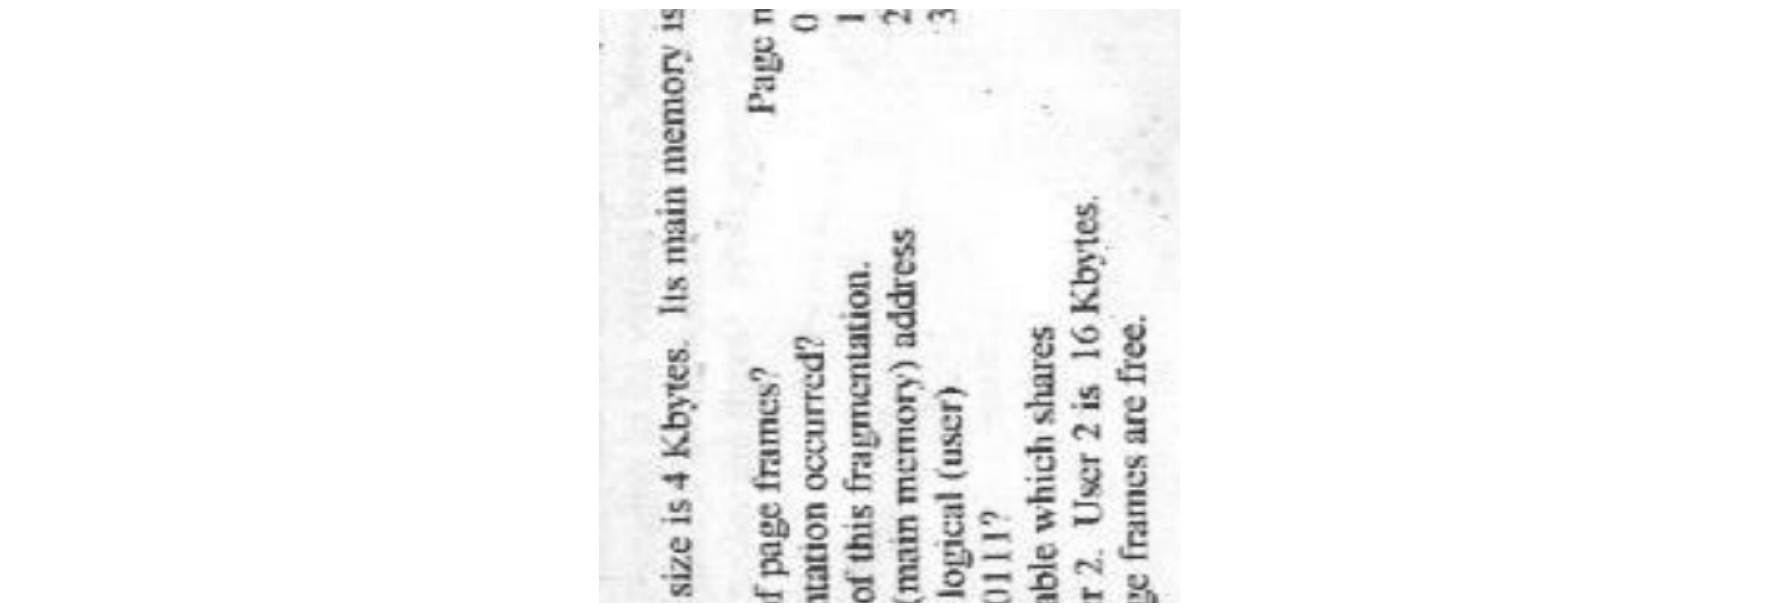

In [112]:
display("E:/CV EPSLON/IntelligentDocSys/backend/datasets/fixed_img.jpg")

Remove Borders


In [113]:
def remove_borders(image):
    contours,heiarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntsorted = sorted(contours, key = lambda x : cv2.contourArea(x))
    cnt = cntsorted[-1]
    x,y,w,h = cv2.boundingRect(cnt)
    crop_img = image[y:y+h, x:x+w]
    return crop_img 
    

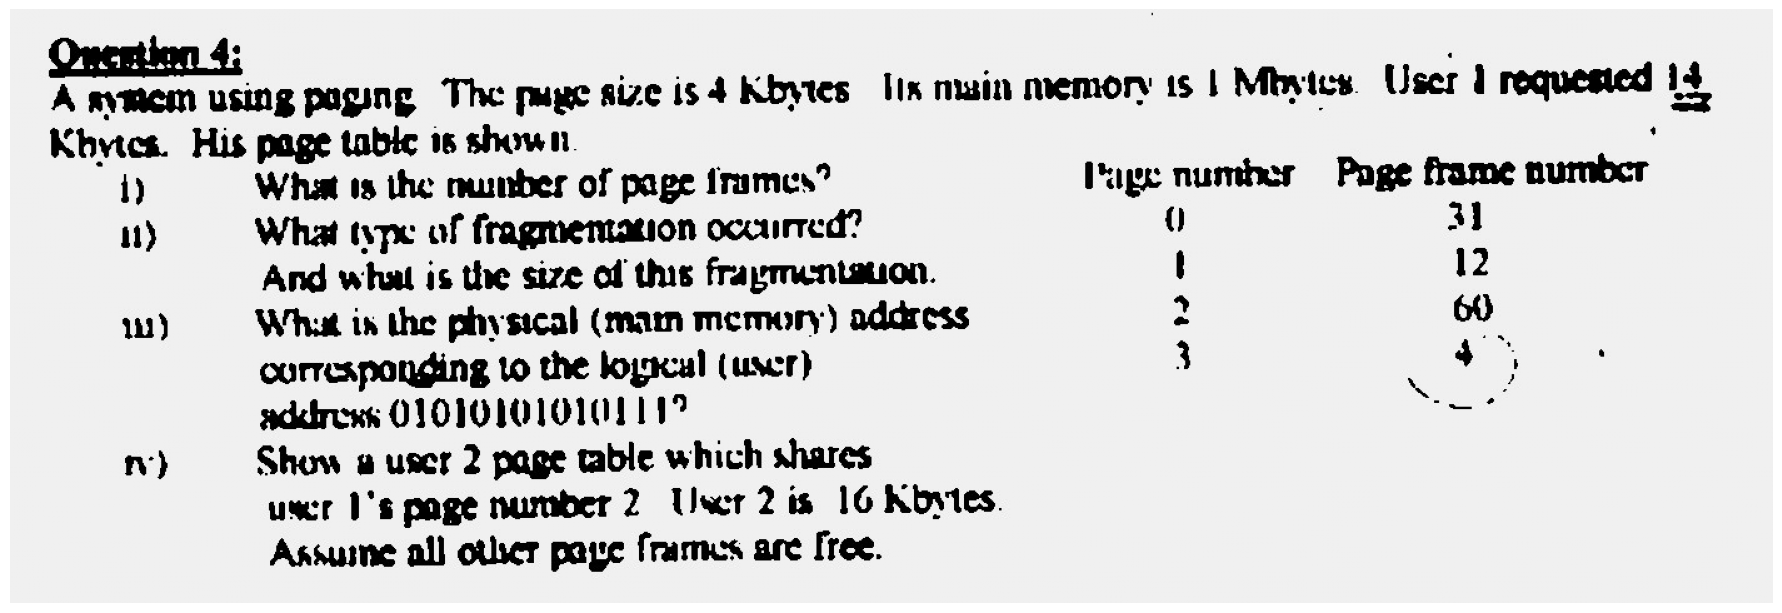

In [114]:
no_borders = remove_borders(no_noise_img)
cv2.imwrite("E:/CV EPSLON/IntelligentDocSys/backend/datasets/no_borders_img.jpg",no_borders)
display("E:/CV EPSLON/IntelligentDocSys/backend/datasets/no_borders_img.jpg")


In [123]:
fixed = deskew_image(no_borders)
cv2.imwrite("E:/CV EPSLON/IntelligentDocSys/backend/datasets/fixed_img.jpg",fixed)

26


True

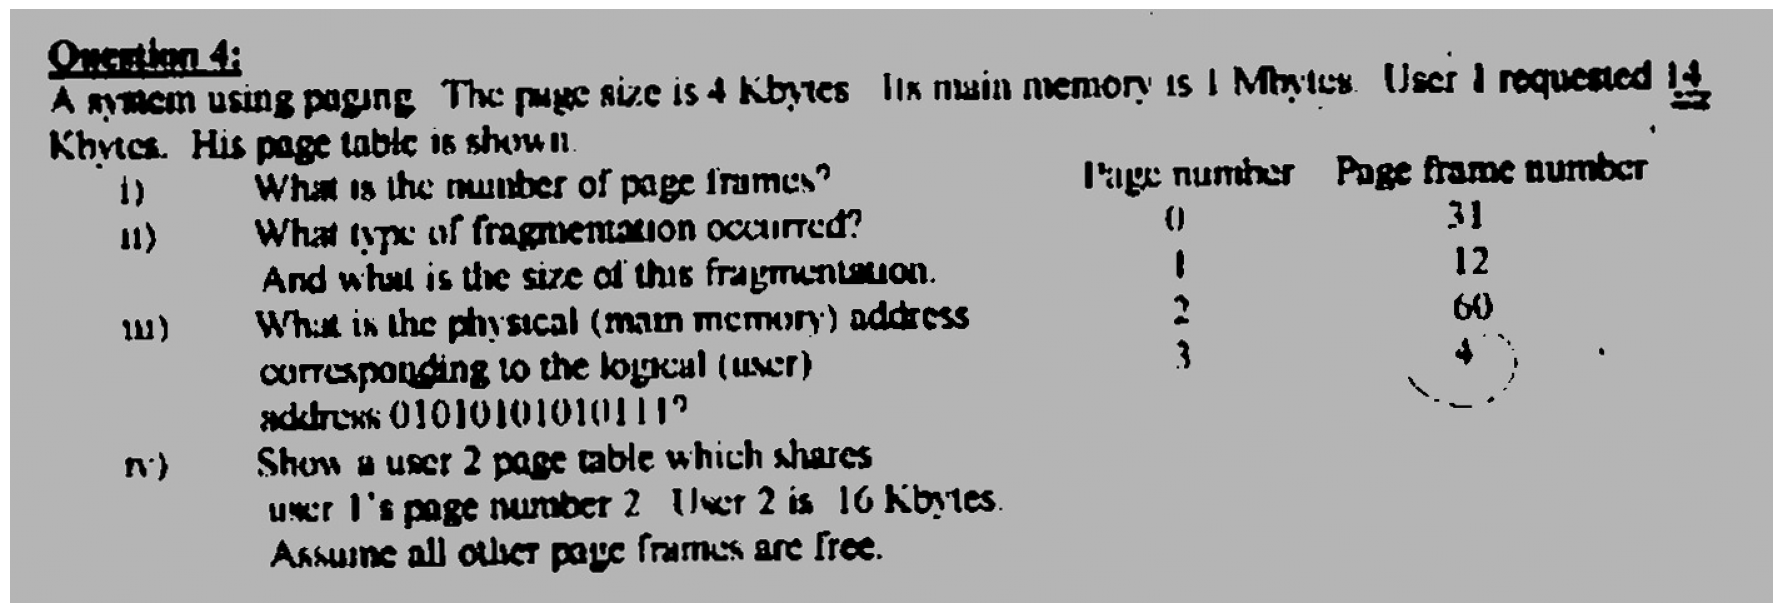

: 

In [ ]:
display("E:/CV EPSLON/IntelligentDocSys/backend/datasets/fixed_img.jpg")